# Making a 4D plotts of the particles on the detector. 

/afs/cern.ch/work/p/ppayemam/miniconda/envs/ramp_velo_challenge/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


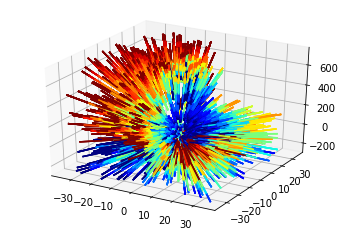

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
import pandas as pd

fig = plt.figure()
ax = fig.gca(projection='3d')


N = 5
y = np.ones((N,1))
x = np.arange(1,N + 1)
z = x #np.ones(len(x)) #5*np.sin(x/5.)

df = pd.DataFrame()
df = pd.read_csv('data2/55microns50psInner55microns50psOuter_EventNumber.txt', sep=' ')
columns = df.columns.values
columns[9] = 'Event'
df.columns = columns
event = 3
df_tmp = df.query(f'Event == {event}' ) #.copy(deep = True)  # inplace=True)

df = df_tmp

ax.set_prop_cycle(color=['red', 'green', 'blue'])
for particle_id in df.particle_id.values: 

    #print(particle_id)
    x = df.query(f"particle_id == {particle_id}")['x'].values
    y = df.query(f"particle_id == {particle_id}")['y'].values
    z = df.query(f"particle_id == {particle_id}")['z'].values

    if len(x) < 3 :
        continue
    
    cn = colors.Normalize(min(z), max(z)) # creates a Normalize object for these z values
    try:
        for i in range(N-1):
            ax.plot(x[i:i+2], y[i:i+2], z[i:i+2], color=plt.cm.jet(cn(z[i])))
    except:
        continue
#fig.colorbar(ax) 
fig.show() 

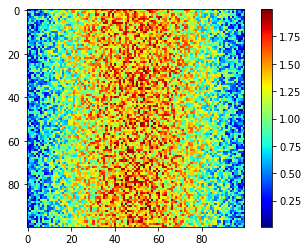

In [6]:
I = np.random.random((100, 100))

I += np.sin(np.linspace(0, np.pi, 100))    
 
fig, ax = plt.subplots()                 
  
im = ax.imshow(I, cmap=plt.cm.jet)       

fig.colorbar(im, ax=ax) 